#  Predicting financial risk using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting the rate of someone facing financial risk being low, medium or high based on their financial and social attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. EDA
6. Preprocessing
7. Modelling
8. Experimentation

## 1. Problem Definition
Given a financial and social parameters about a person, can we predict the rate of the financial risk level that they are in.

## 2. Data
The data is taken from the kaggle website.The link: https://www.kaggle.com/datasets/preethamgouda/financial-risk/data. Please note that these data is taken from USA. 

## 3. Evaluation
If we can reach 75% accuracy at predicting the financial risk rate correctly, we'll pursue the project.

## 4. Features
Describing all the features in the dataset

1. Age: The age of the individual, a continuous variable influencing financial stability.
   * Ranges from 18 years to 69 years
2. Gender: Gender of the individual
   * Male
   * Female
   * Non-binary
3. Education level: Highest level of education achieved
   * Bachelor's
   * High school
   * PhD
4. Marital status: Current marital status
   * Widowed
   * divorced
   * single
   * married
5. Income: Ranges from 20k to 120k in USD
6. Credit score: Numeric value indicating creditworthiness ranges from 600 to 799
7. Loan Amount: The amount of loan requested by the individual. Ranges from 5k to 50k in USD
8. Loan purpose: The purpose of the loan, categorized into
   * Home
   * Auto
   * Personal
   * Business
9. Employment Status: Employment situation of the individual, including
   * Employed
   * Unemployed
   * Self-employed
10. Years at current job: Duration of employment at the current job, reflecting job stability.  Ranges from 0 to 19
13. Payment history: Historical payment performance, categorized into
    * Excellent
    * Good
    * Fair
    * Poor.
15. Debt-to-Income Ratio: Ratio of debt to income, indicating financial leverage and risk. Ranges from 0.1 to 0.6
16. Assets value: Total value of assets owned by the individual. Ranges from 20.1k to 300k in USD
17. Number of dependents: Dependents supported by the individual, affecting financial responsibilities. Rnages from 0 to 4.
18. City: City where the individual resides, providing geographic context. 
19. State: State where the individual resides, giving further geographic detail. 
20. Country: Country of residence, adding a global perspective
21. Previous defaults: Number of previous loan defaults, indicating historical financial risk. Ranges from 0 to 4
22. Marital Status change: Number of changes in marital status, reflecting personal life changes. Rnages from 0 to 2
23. Risk rating: Target column categorizing financial risk into
    * Low
    * Medium
    * High

### Preparing the tools

In [3]:
#EDA(exploring data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data

In [5]:
dataset = pd.read_csv("financial_risk_assessment.csv")
dataset.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


### 5. Data Exploration (EDA)

In [7]:
# Check the number of rows and columns inthe dataset
dataset.shape

(15000, 20)

In [8]:
# Check the data types
dataset.dtypes

Age                        int64
Gender                    object
Education Level           object
Marital Status            object
Income                   float64
Credit Score             float64
Loan Amount              float64
Loan Purpose              object
Employment Status         object
Years at Current Job       int64
Payment History           object
Debt-to-Income Ratio     float64
Assets Value             float64
Number of Dependents     float64
City                      object
State                     object
Country                   object
Previous Defaults        float64
Marital Status Change      int64
Risk Rating               object
dtype: object

In [9]:
# Check whether there are any missing values
dataset.isna().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

We will be dealing with the null values in the data preprocessing

In [11]:
# get more details about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [12]:
# get more information about the numerical data
dataset.describe()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


In [13]:
# how many of each data are there in the class column
dataset["Risk Rating"].value_counts()

Risk Rating
Low       9000
Medium    4500
High      1500
Name: count, dtype: int64

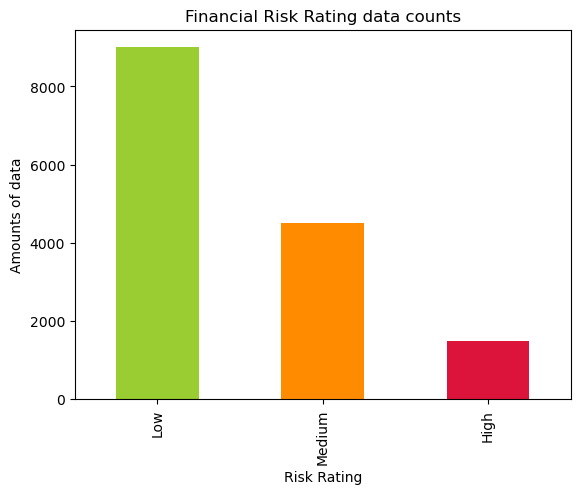

In [14]:
# visualize the value counts
dataset["Risk Rating"].value_counts().plot(kind="bar", color=["yellowgreen", "darkorange", "crimson"])
plt.title("Financial Risk Rating data counts")
plt.ylabel("Amounts of data");

There is a class imbalance that we will be delt with in the preprocessing section

### Compare risk rating vs number of dependents 

In [17]:
dataset.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [18]:
pd.crosstab(dataset["Number of Dependents"], dataset["Risk Rating"])

Risk Rating,High,Low,Medium
Number of Dependents,,,
0.0,246,1483,714
1.0,276,1542,772
2.0,240,1522,754
3.0,247,1561,780
4.0,260,1552,801


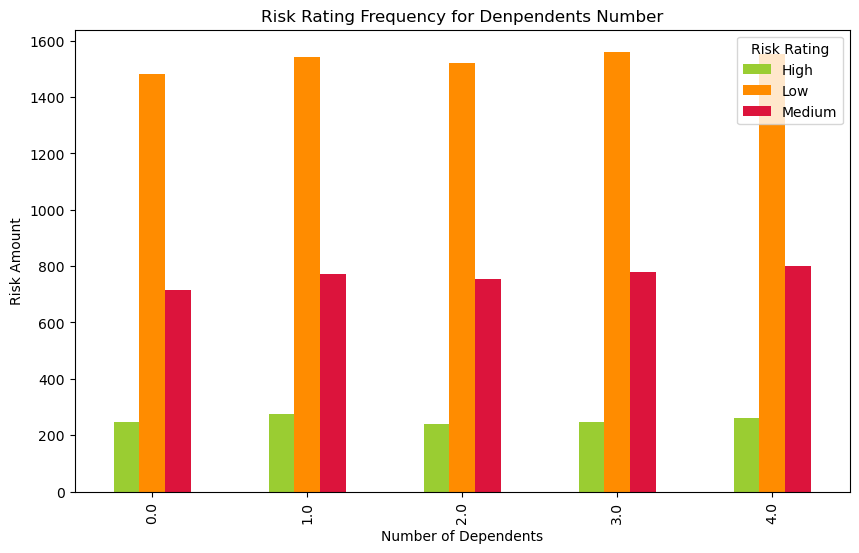

In [19]:
# Create a plot of crosstab
pd.crosstab(dataset["Number of Dependents"], dataset["Risk Rating"]).plot(kind="bar",
                                                                    figsize=(10, 6),
                                                                    color=["yellowgreen", "darkorange", "crimson"])

plt.title("Risk Rating Frequency for Denpendents Number")
plt.ylabel("Risk Amount");


### CGender Percentage

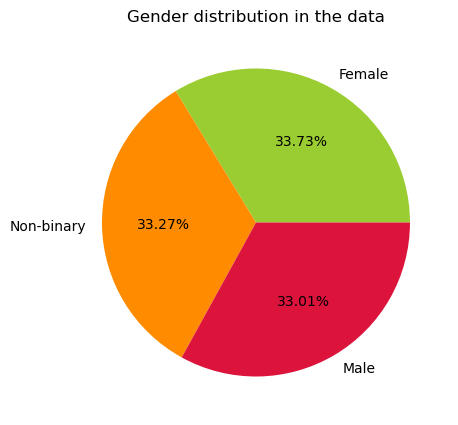

In [21]:
plt.figure(figsize=(10,5))
dataset['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',
    labels=['Female','Non-binary','Male'],
    colors=["yellowgreen", "darkorange", "crimson"],
    autopct='%1.2f%%')
plt.title('Gender distribution in the data')
plt.ylabel("")
plt.show()



### Compare risk rating vs City

In [23]:
dataset.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


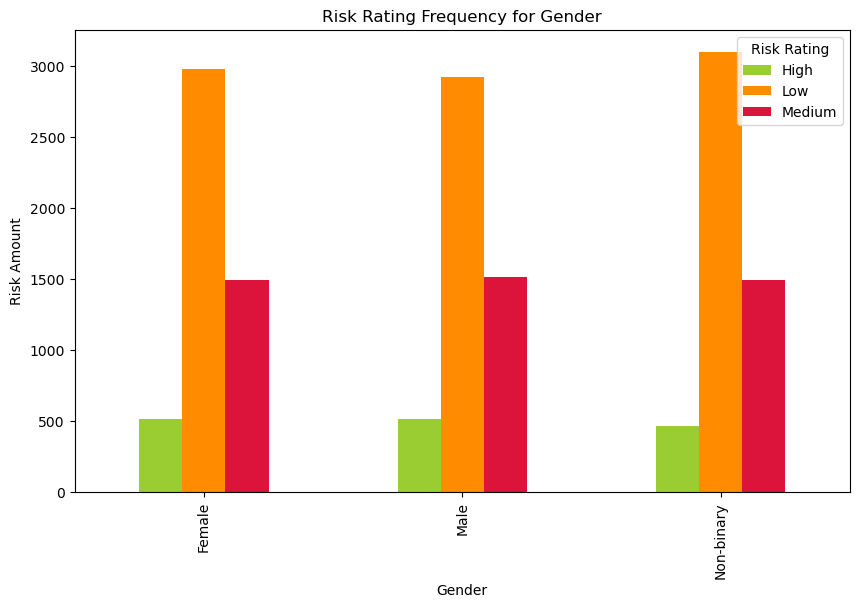

In [24]:
pd.crosstab(dataset["Gender"], dataset["Risk Rating"]).plot(kind="bar",
                                                            figsize=(10, 6),
                                                            color=["yellowgreen", "darkorange", "crimson"])

plt.title("Risk Rating Frequency for Gender")
plt.ylabel("Risk Amount");

## 6. Preprocessing

In [26]:
dataset

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


In [27]:
#finding missing values
dataset.isnull().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

Replacing Missing Values 

In [30]:
dataset_null_columns  = dataset.isnull().sum()[dataset.isnull().sum() > 0].index.values
dataset_null_columns

array(['Income', 'Credit Score', 'Loan Amount', 'Assets Value',
       'Number of Dependents', 'Previous Defaults'], dtype=object)

In [31]:
fill_values = {col: dataset[col].mean() for col in dataset_null_columns}
dataset.fillna(value=fill_values, inplace=True)

In [32]:
dataset.isna().sum()

Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64

In [33]:
dataset.shape

(15000, 20)

In [34]:
#create dependent & independent variable vectors
X = dataset.drop('Risk Rating', axis=1)
y = dataset['Risk Rating']

In [35]:
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (12000, 19), y_train: (12000,)
Test set shape: X_test: (3000, 19), y_test: (3000,)


In [36]:
X_train

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change
9839,52,Non-binary,Bachelor's,Single,102445.00000,730.000000,19851.000000,Auto,Unemployed,0,Excellent,0.410919,159741.497176,0.00000,Browningborough,NY,Bangladesh,1.992471,0
9680,19,Non-binary,Bachelor's,Widowed,69933.39851,698.000000,10016.000000,Auto,Unemployed,10,Fair,0.148540,299307.000000,4.00000,Port William,CA,Iceland,2.000000,1
7093,41,Male,PhD,Widowed,73096.00000,711.000000,25710.000000,Auto,Self-employed,5,Fair,0.327889,138680.000000,2.00000,Donnafurt,RI,Thailand,4.000000,1
11293,49,Female,Bachelor's,Married,59044.00000,699.109098,28995.000000,Personal,Self-employed,17,Poor,0.282694,74182.000000,3.00000,Turnerport,TX,Israel,2.000000,1
820,21,Male,Bachelor's,Married,40547.00000,730.000000,48524.000000,Business,Self-employed,15,Good,0.444251,195974.000000,3.00000,Lake Phillipport,MH,Algeria,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,68,Non-binary,Master's,Divorced,64763.00000,610.000000,16474.000000,Home,Self-employed,3,Excellent,0.274192,204689.000000,3.00000,Williefurt,IA,Algeria,2.000000,1
13418,23,Male,PhD,Divorced,83862.00000,773.000000,28902.000000,Auto,Employed,4,Good,0.295112,157925.000000,0.00000,Pattersontown,TX,Niger,0.000000,2
5390,65,Female,Bachelor's,Single,112338.00000,709.000000,27450.010902,Home,Self-employed,15,Excellent,0.530889,181157.000000,3.00000,Wrighttown,NV,Eritrea,1.000000,0
860,28,Non-binary,PhD,Divorced,27585.00000,699.109098,5748.000000,Home,Unemployed,12,Fair,0.484705,159741.497176,2.02651,Thomasburgh,MT,Comoros,4.000000,1


In [37]:
X_train.dtypes

Age                        int64
Gender                    object
Education Level           object
Marital Status            object
Income                   float64
Credit Score             float64
Loan Amount              float64
Loan Purpose              object
Employment Status         object
Years at Current Job       int64
Payment History           object
Debt-to-Income Ratio     float64
Assets Value             float64
Number of Dependents     float64
City                      object
State                     object
Country                   object
Previous Defaults        float64
Marital Status Change      int64
dtype: object

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create the OneHotEncoder with handle_unknown="ignore"
one_hot = OneHotEncoder(handle_unknown="ignore")

categorical_features = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 
                        'Employment Status', 'Payment History', 'City', 'State', 'Country']

# Create the ColumnTransformer with the OneHotEncoder
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fit the transformer on the training data
transformer.fit(X_train)

# Transform both training and validation data
transformed_X_train = transformer.transform(X_train)
transformed_X_test = transformer.transform(X_test)

# Optionally convert to array if needed
transformed_X_train_array = transformed_X_train.toarray()
print(transformed_X_train_array)

[[0.         0.         1.         ... 0.         1.99247059 0.        ]
 [0.         0.         1.         ... 4.         2.         1.        ]
 [0.         1.         0.         ... 2.         4.         1.        ]
 ...
 [1.         0.         0.         ... 3.         1.         0.        ]
 [0.         0.         1.         ... 2.0265098  4.         1.        ]
 [1.         0.         0.         ... 2.         1.         2.        ]]


In [39]:
from sklearn.preprocessing import MaxAbsScaler 

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(transformed_X_train)
X_test = scaler.fit_transform(transformed_X_test)

# Print shapes
print(f"X_train_scaled shape: {X_train.shape}")
print(f"X_test_scaled shape: {X_test.shape}")


X_train_scaled shape: (12000, 9187)
X_test_scaled shape: (3000, 9187)


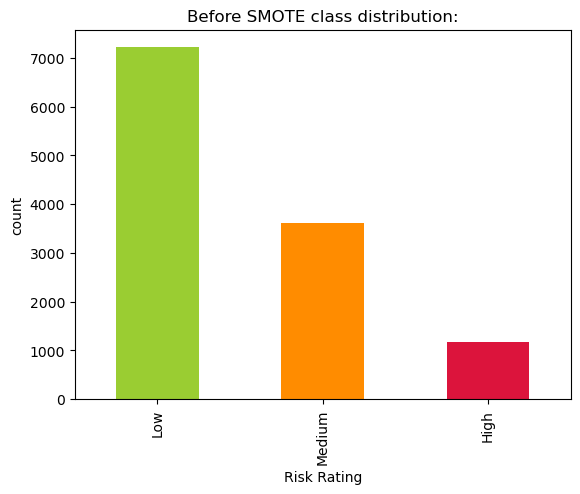

In [40]:
# Checking the class imbalance
y_train.value_counts().plot(kind="bar", color=["yellowgreen", "darkorange", "crimson"])
plt.title("Before SMOTE class distribution:")
plt.ylabel("count");

In [41]:
y_train.shape

(12000,)

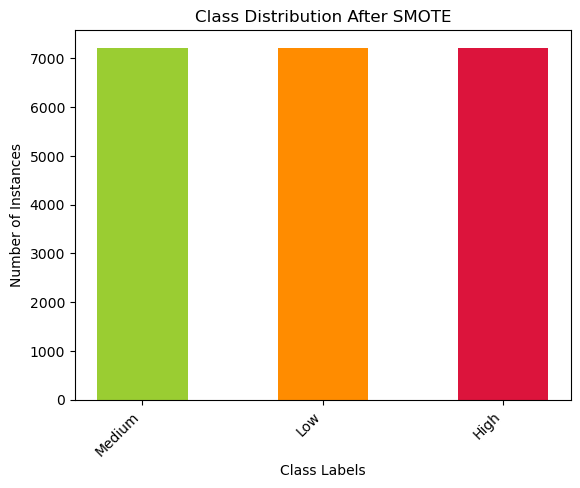

After SMOTE class distribution: Counter({'Medium': 7221, 'Low': 7221, 'High': 7221})


In [42]:
# Dealing with the class imbalance
!pip install imbalanced-learn

# Import the necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data 
X_train, y_train = smote.fit_resample(X_train, y_train)

# Count the number of instances in each class after SMOTE
class_counts = Counter(y_train)

# Plot the class distribution
labels, values = zip(*class_counts.items())  # Unzip the labels and counts

plt.bar(labels, values, width=0.5, color=["yellowgreen", "darkorange", "crimson"])

plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.title('Class Distribution After SMOTE')
# Rotate x-axis labels for better readability
plt.xticks(labels, rotation=45, ha='right', fontsize=10)

plt.show()

# Print the class distribution after SMOTE
print("After SMOTE class distribution:", Counter(y_train))

In [43]:
y_train.shape

(21663,)

In [44]:
X_train.shape

(21663, 9187)

In [45]:
y_train.dtypes

dtype('O')

In [46]:
# Encoding the target varible
# Using the labelEncoder - Suitable for ordinal (ranked) categories 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [47]:
y_train, y_train.shape

(array([2, 2, 2, ..., 2, 2, 2]), (21663,))

In [48]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (21663, 9187)
X_test shape:  (3000, 9187)
y_train shape:  (21663,)
y_test shape:  (3000,)


Now the class imbalance, categorical value encoding and numerical value scaling has been complete. Let's go to model building

### 7. Modeling

First of all let's try XGBoost Model

In [89]:
# Importing the necessary libraries
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:03:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### XGBoost Model Evaluation

Training Accuracy: 0.7576512948345104
Test Accuracy: 0.5903333333333334

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      7221
           1       0.61      1.00      0.76      7221
           2       0.97      0.45      0.61      7221

    accuracy                           0.76     21663
   macro avg       0.83      0.76      0.75     21663
weighted avg       0.83      0.76      0.75     21663


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       326
           1       0.59      0.99      0.74      1779
           2       0.34      0.01      0.03       895

    accuracy                           0.59      3000
   macro avg       0.31      0.33      0.26      3000
weighted avg       0.45      0.59      0.45      3000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


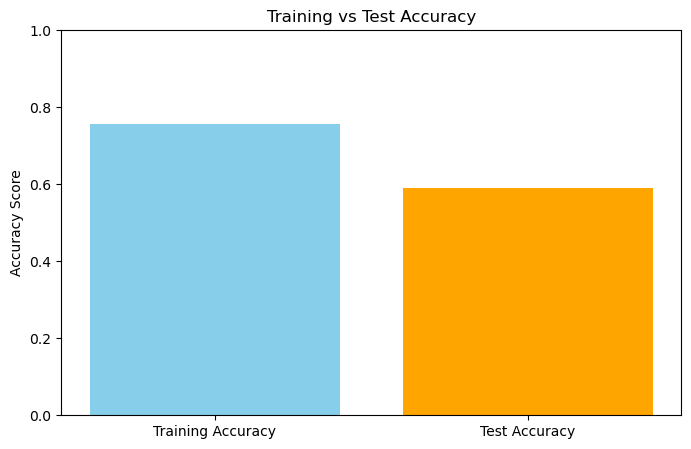

In [92]:
# Importing necessary libraries for evaluation and visualization
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Evaluate the model on training and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy metrics
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Generate classification reports for training and test sets
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

# Plotting the training and test accuracy
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] to represent accuracy as percentage

# Add labels and title
plt.ylabel('Accuracy Score')
plt.title('Training vs Test Accuracy')

# Display the plot
plt.show()

To get more testing accuracy Let's do the hyper parameter tuning for the model

In [95]:

# Importing necessary libraries for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 7],        
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.8, 1.0],       
    'colsample_bytree': [0.8, 1.0],  
    'gamma': [0, 0.1, 0.2],        
    'reg_alpha': [0, 0.01, 0.1],   
    'reg_lambda': [0.1, 1.0],      
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# RandomizedSearchCV with 10 iterations (you can increase it if you have more time)
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print(f"Best Parameters: {random_search.best_params_}")

# Evaluate the tuned model
best_model = random_search.best_estimator_
y_pred_test_tuned = best_model.predict(X_test)

# Print the new test accuracy and classification report
test_accuracy_tuned = accuracy_score(y_test, y_pred_test_tuned)
print(f"Tuned Test Accuracy: {test_accuracy_tuned}")
print("Tuned Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test_tuned))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:04:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Tuned Test Accuracy: 0.5906666666666667
Tuned Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       326
           1       0.59      0.99      0.74      1779
           2       0.25      0.00      0.01       895

    accuracy                           0.59      3000
   macro avg       0.28      0.33      0.25      3000
weighted avg       0.43      0.59      0.44      3000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### CatBoost Model

In [97]:
# Import necessary library for CatBoost
from catboost import CatBoostClassifier

# Initialize the CatBoost model with random_state
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Train the CatBoost model on the SMOTE-balanced data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test_catboost = catboost_model.predict(X_test)

### Model Evaluation

CatBoost Training Accuracy: 0.7650833217929188
CatBoost Test Accuracy: 0.585
CatBoost Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       326
           1       0.59      0.96      0.74      1779
           2       0.35      0.04      0.08       895

    accuracy                           0.58      3000
   macro avg       0.32      0.34      0.27      3000
weighted avg       0.46      0.58      0.46      3000



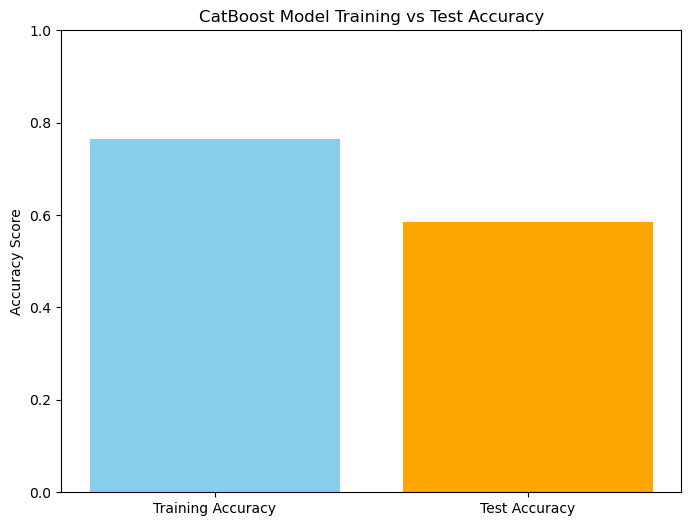

In [60]:
# Import necessary libraries for evaluation and plotting
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Evaluate the model performance on the training data
y_pred_train_catboost = catboost_model.predict(X_train)
train_accuracy_catboost = accuracy_score(y_train, y_pred_train_catboost)

# Evaluate the model performance on the test data
test_accuracy_catboost = accuracy_score(y_test, y_pred_test_catboost)

# Print both accuracies
print(f"CatBoost Training Accuracy: {train_accuracy_catboost}")
print(f"CatBoost Test Accuracy: {test_accuracy_catboost}")

# Print the classification report for the test set
print("CatBoost Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test_catboost))

# Plot the accuracies
metrics = ['Training Accuracy', 'Test Accuracy']
values = [train_accuracy_catboost, test_accuracy_catboost]

# Create a bar plot for both training and test accuracy
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'orange'])

# Add title and labels
plt.title('CatBoost Model Training vs Test Accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy as a percentage

# Show the plot
plt.show()


To get more Testing Accuracy let's do hyper parameter tuning

In [102]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Define a very small parameter grid for RandomizedSearchCV
param_grid = {
    'depth': [6],  # Fix depth
    'learning_rate': [0.1],  # Fix learning rate
    'iterations': [200],  # Fix iterations
    'l2_leaf_reg': [3],  # Fix regularization
}

# Initialize RandomizedSearchCV with minimal parameters
catboost_random_search = RandomizedSearchCV(
    estimator=CatBoostClassifier(random_state=42, verbose=0),
    param_distributions=param_grid,
    n_iter=5,  # Only 5 combinations
    scoring='accuracy',
    cv=3,  # Only 2 folds
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV to the training data
catboost_random_search.fit(X_train, y_train)

# Print the best parameters found
print(f"Best parameters found: {catboost_random_search.best_params_}")

# Retrieve the best model
best_catboost_model = catboost_random_search.best_estimator_

# Make predictions on the test set
y_pred_test_catboost_tuned = best_catboost_model.predict(X_test)

# Evaluate the tuned model
test_accuracy_catboost_tuned = accuracy_score(y_test, y_pred_test_catboost_tuned)
print(f"Tuned CatBoost Test Accuracy: {test_accuracy_catboost_tuned}")
print("Tuned CatBoost Classification Report:")
print(classification_report(y_test, y_pred_test_catboost_tuned))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 6}
Tuned CatBoost Test Accuracy: 0.589
Tuned CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       326
           1       0.59      0.99      0.74      1779
           2       0.36      0.01      0.03       895

    accuracy                           0.59      3000
   macro avg       0.32      0.33      0.26      3000
weighted avg       0.46      0.59      0.45      3000



### Random Forest Classification Model

In [90]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [92]:
# Evaluation on training data
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))

# Evaluation on test data
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))


Training Accuracy: 1.0
Test Accuracy: 0.5863333333333334


To get more Testing Accuracy let's do hyper parameter tuning

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define a parameter grid that balances simplicity and performance
param_grid = {
    'n_estimators': [50, 100],  # Smaller number of trees to reduce complexity
    'max_depth': [None, 10, 15],  # Allow deeper trees where necessary
    'min_samples_split': [5, 10],  # Prevent overfitting by requiring more samples
    'min_samples_leaf': [2, 4],  # Prevent overfitting with larger leaf nodes
    'max_features': ['sqrt'],  # Standard choice for classification
}

# Use Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Set up GridSearchCV with StratifiedKFold
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              cv=skf, verbose=2, n_jobs=-1)

# Perform the grid search
rf_grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", rf_grid_search.best_params_)

# Use the best model
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the best model on the training and test set
y_pred_train_best = best_rf_model.predict(X_train)
y_pred_test_best = best_rf_model.predict(X_test)

# Training set evaluation
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_best))

# Test set evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_best))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Training Accuracy: 0.8518672390712274
Test Accuracy: 0.5753333333333334


### Model Saving

In [98]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [100]:
X_test.columns

AttributeError: 'csr_matrix' object has no attribute 'columns'